In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from matplotlib import pyplot as plt

compute loss

In [2]:
def loss_function(y_predict, y_true):
    loss = 0.0
    for i in range(len(y_predict)):
        loss += (y_predict[i] - y_true[i]) ** 2
    return loss / 2 / len(y_predict)

read data

In [3]:
data = load_svmlight_file('H:/ML/experiment/housing_scale.txt')
ones = np.ones(data[0].shape[0])
all_data = np.reshape(data[0].data, (data[0].shape[0], data[0].shape[1]))
all_data = np.column_stack((all_data, ones))
all_label = np.reshape(data[1].data, (data[1].shape[0], 1))
x_train, x_valid, y_train, y_valid = train_test_split(all_data, all_label, test_size=0.1)

initialize params

In [4]:
max_epoch = 500
eta = 0.001
w = np.random.random((x_train.shape[1], 1))
train_loss = []
valid_loss = []

compute gradient, and then update it by gradient descent, finally compute the train loss and valid loss

In [5]:
for i in range(0, max_epoch):
    y_predict = np.dot(x_train, w)
    gradient = (x_train * (y_predict - y_train)).sum(axis=0) / len(x_train)
    gradient = np.reshape(gradient, (len(gradient), 1))
    w = w - eta * gradient
    train_loss.append(loss_function(np.dot(x_train, w), y_train))
    valid_loss.append(loss_function(np.dot(x_valid, w), y_valid))

plot the curve of train loss and valid loss

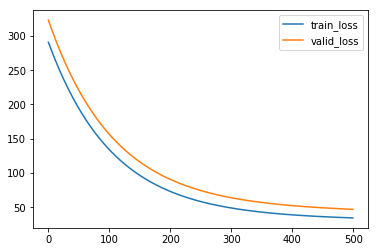

In [6]:
plt.plot(train_loss, label=u'train_loss')
plt.plot(valid_loss, label=u'valid_loss')
plt.legend()
plt.show()